<a href="https://colab.research.google.com/github/DemetrioJMartins/ada_tech_santander_coders/blob/main/projeto_tecnicas_de_programacao_demetrio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando as bibliotecas que usarei para o meu projeto

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Usarei os dados fornecidos nas aulas, acredito que com meu conhecimento sobre o assunto conseguirei extrair o maximo de informações sobre o assunto

In [ ]:
pokedex = pd.read_csv('/content/drive/MyDrive/data/pokemon_data.csv')

In [ ]:
pokedex

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


Nessa parte fiz o tratamento dos dados, começando pelos tipos

In [ ]:
tipo_1 = pokedex['Type 1']
tipo_2 = pokedex['Type 2']
tipo_1

0        Grass
1        Grass
2        Grass
3        Grass
4         Fire
        ...   
795       Rock
796       Rock
797    Psychic
798    Psychic
799       Fire
Name: Type 1, Length: 800, dtype: object

Criei a coluna Total Base Stats, que é uma forma comum usada para avaliar o nivel de força dos Pokemon

In [ ]:
pokedex['Total Base Stats'] = pokedex['HP'] + pokedex['Attack'] + pokedex['Defense'] + pokedex['Sp. Atk'] + pokedex['Sp. Def'] + pokedex['Speed']
pokedex['Type 2'] = pokedex['Type 2'].fillna(tipo_1)
pokedex

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Base Stats
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,Fire,39,52,43,60,50,65,1,False,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,700
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,600
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,680


Separando a quantidade de Pokemon por tipos

In [ ]:
quantidade = tipo_1.value_counts()
quantidade

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

Criei uma coluna para indentificar os Pokemon Mega e Primal, não utilizarei por ser uma mecânica que não foi utilizada em competições de pokemon

In [ ]:
pokedex['Megas'] = pokedex['Name'].str.split('[A-Z]').str[2]

In [ ]:
mascara = pokedex['Megas'] == 'ega '
megas = pokedex.loc[mascara]
megas

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Base Stats,Megas
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625,ega
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False,634,ega
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False,634,ega
12,9,BlastoiseMega Blastoise,Water,Water,79,103,120,135,115,78,1,False,630,ega
19,15,BeedrillMega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False,495,ega
23,18,PidgeotMega Pidgeot,Normal,Flying,83,80,80,135,80,121,1,False,579,ega
71,65,AlakazamMega Alakazam,Psychic,Psychic,55,50,65,175,95,150,1,False,590,ega
87,80,SlowbroMega Slowbro,Water,Psychic,95,75,180,130,80,30,1,False,590,ega
102,94,GengarMega Gengar,Ghost,Poison,60,65,80,170,95,130,1,False,600,ega
124,115,KangaskhanMega Kangaskhan,Normal,Normal,105,125,100,60,100,100,1,False,590,ega


In [ ]:
megas.index

Int64Index([  3,   7,   8,  12,  19,  23,  71,  87, 102, 124, 137, 141, 154,
            163, 164, 196, 224, 229, 232, 248, 268, 275, 279, 283, 306, 327,
            329, 333, 336, 339, 349, 354, 366, 387, 393, 397, 409, 413, 418,
            420, 426, 476, 494, 498, 511, 527, 591, 796],
           dtype='int64')

In [ ]:
pokedex = pokedex.drop(megas.index, axis = 0)

In [ ]:
mascara = pokedex['Megas'] == 'rimal '
primal = pokedex.loc[mascara]
primal.index

Int64Index([422, 424], dtype='int64')

In [ ]:
pokedex = pokedex.drop(primal.index, axis = 0)

In [ ]:
pokedex = pokedex.reset_index()
pokedex

,index,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Base Stats,Megas
0,0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318,NaN
1,1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405,NaN
2,2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525,NaN
3,4,4,Charmander,Fire,Fire,39,52,43,60,50,65,1,False,309,NaN
4,5,5,Charmeleon,Fire,Fire,58,64,58,80,65,80,1,False,405,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,794,718,Zygarde50% Forme,Dragon,Ground,108,100,121,81,95,95,6,True,600,orme
746,795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600,NaN
747,797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,600,oopa
748,798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,680,oopa


Criei um lista de cores, cada cor se relaciona com o tipo do Pokemon

In [ ]:
color = ['#78c850','#f05030','#6890f0', '#a8b820', '#a8a878', '#a040a0', '#f8d030', '#e0c068', "#f7a1bb", '#903028', '#f85888', '#b8a038', '#705898', '#98d8d8', '#7038f8', '#705848', '#b8b8d0', '#a890f0']

# No primeiro grafico fiz uma comparação para ver qual tipo possui os Pokemon mais fortes

<ipython-input-16-9439b96b3db3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = tipo_1, y = 'Total Base Stats', data = pokedex, palette = color)


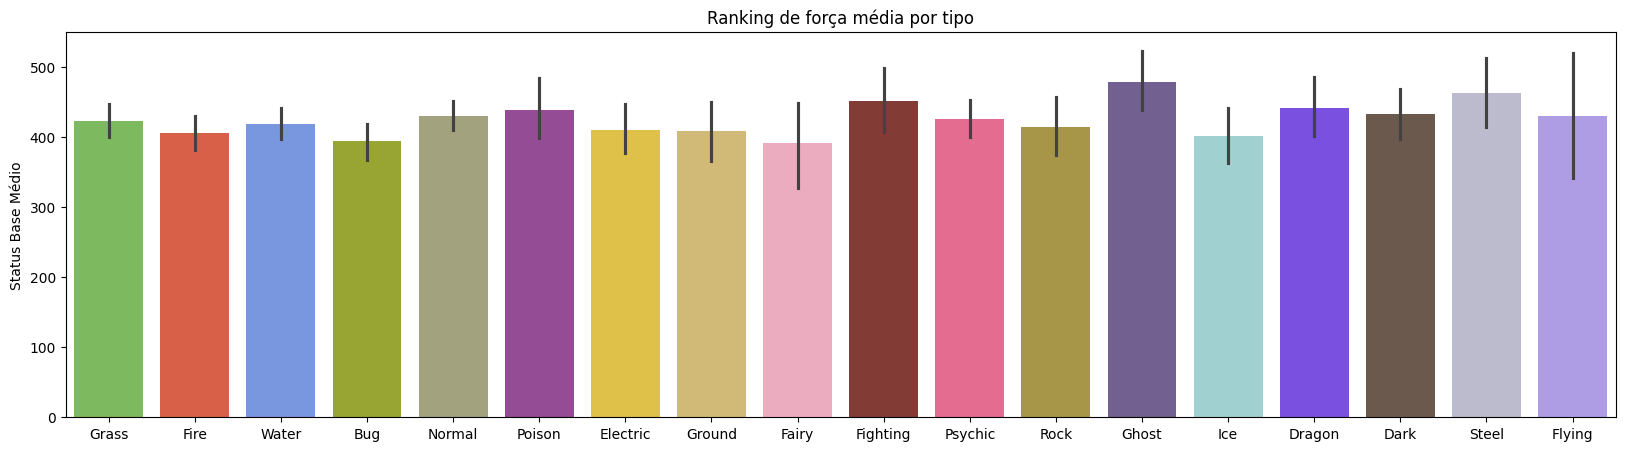

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x = tipo_1, y = 'Total Base Stats', data = pokedex, palette = color)
plt.title('Ranking de força média por tipo')
plt.ylabel('Status Base Médio')
plt.xlabel('')
plt.show()

<ipython-input-17-2c3b258a6a4d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = tipo_1, y = 'Legendary', data = pokedex, palette = color)


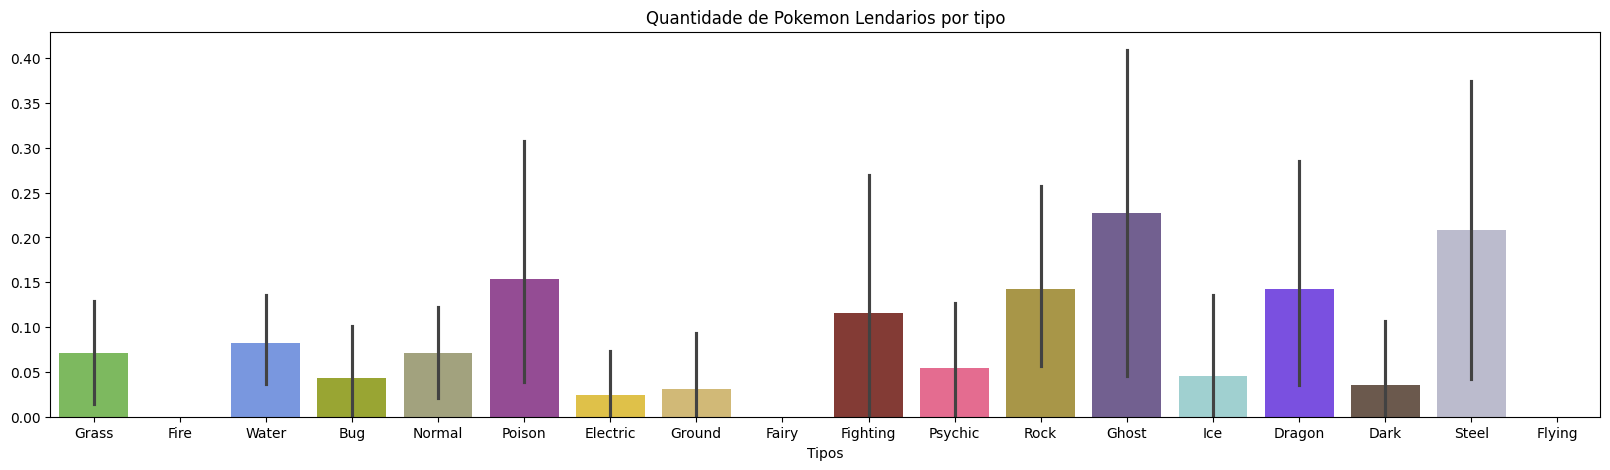

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x = tipo_1, y = 'Legendary', data = pokedex, palette = color)
plt.title('Quantidade de Pokemon Lendarios por tipo')
plt.ylabel('')
plt.xlabel('Tipos')
plt.show()

Após fazer a comoparação de força entre tipos, fiz a relação do tipo com fato do pokemon ser ou não lendário, e de fato, os tipos mais fortes estão diretamente relacionados com a quantidade de lendário que possuem aquele tipo

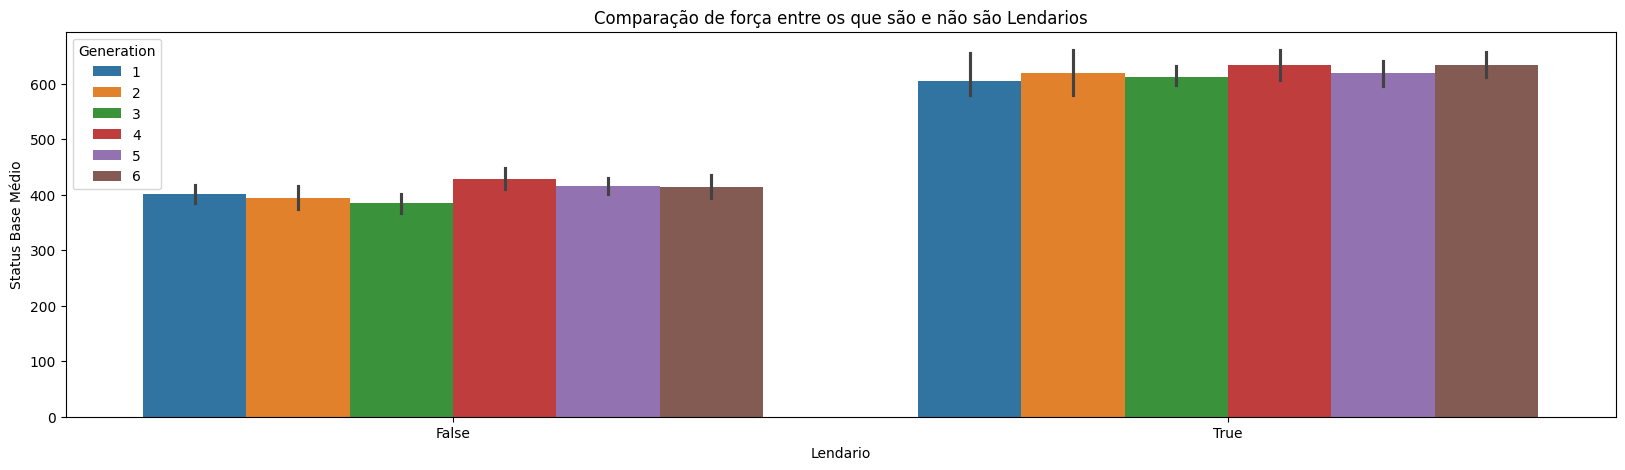

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x = 'Legendary', y = 'Total Base Stats', data = pokedex, hue = 'Generation', palette = "tab10")
plt.title('Comparação de força entre os que são e não são Lendarios')
plt.ylabel('Status Base Médio')
plt.xlabel('Lendario')
plt.show()

Nesses dois graficos é possivel observar que a força dos pokemon foi aumentando ao passar das gerações, tendo seu auge de força na quarta geração

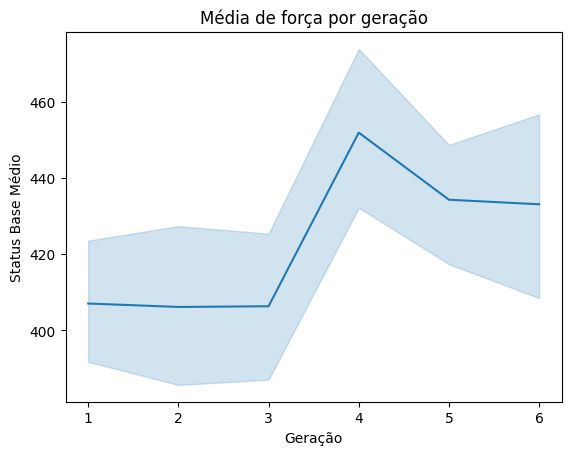

In [ ]:
sns.lineplot(x = 'Generation', y = 'Total Base Stats', data = pokedex)
plt.title('Média de força por geração')
plt.ylabel('Status Base Médio')
plt.xlabel('Geração')
plt.show()

In [ ]:
top = pokedex.sort_values(['Total Base Stats'], ascending = False)
top_10 = top.head(10)
top_10

,index,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total Base Stats,Megas
504,552,493,Arceus,Normal,Normal,120,120,120,120,120,120,4,True,720,NaN
663,712,646,KyuremWhite Kyurem,Dragon,Ice,125,120,90,170,100,95,5,True,700,hite
662,711,646,KyuremBlack Kyurem,Dragon,Ice,125,170,100,120,90,95,5,True,700,lack
149,162,150,Mewtwo,Psychic,Psychic,106,110,90,154,90,130,1,True,680,NaN
493,541,484,Palkia,Water,Dragon,90,120,100,150,120,100,4,True,680,NaN
496,544,487,GiratinaAltered Forme,Ghost,Dragon,150,100,120,100,120,90,4,True,680,ltered
497,545,487,GiratinaOrigin Forme,Ghost,Dragon,150,120,100,120,100,90,4,True,680,rigin
383,425,384,Rayquaza,Dragon,Flying,105,150,90,150,90,95,3,True,680,NaN
657,706,643,Reshiram,Dragon,Fire,100,120,100,150,120,90,5,True,680,NaN
658,707,644,Zekrom,Dragon,Electric,100,150,120,120,100,90,5,True,680,NaN


Puxando apenas os 10 mais fortes, vemos que todos são , mas se retirarmos os lendários, qual sera o top 10 ?

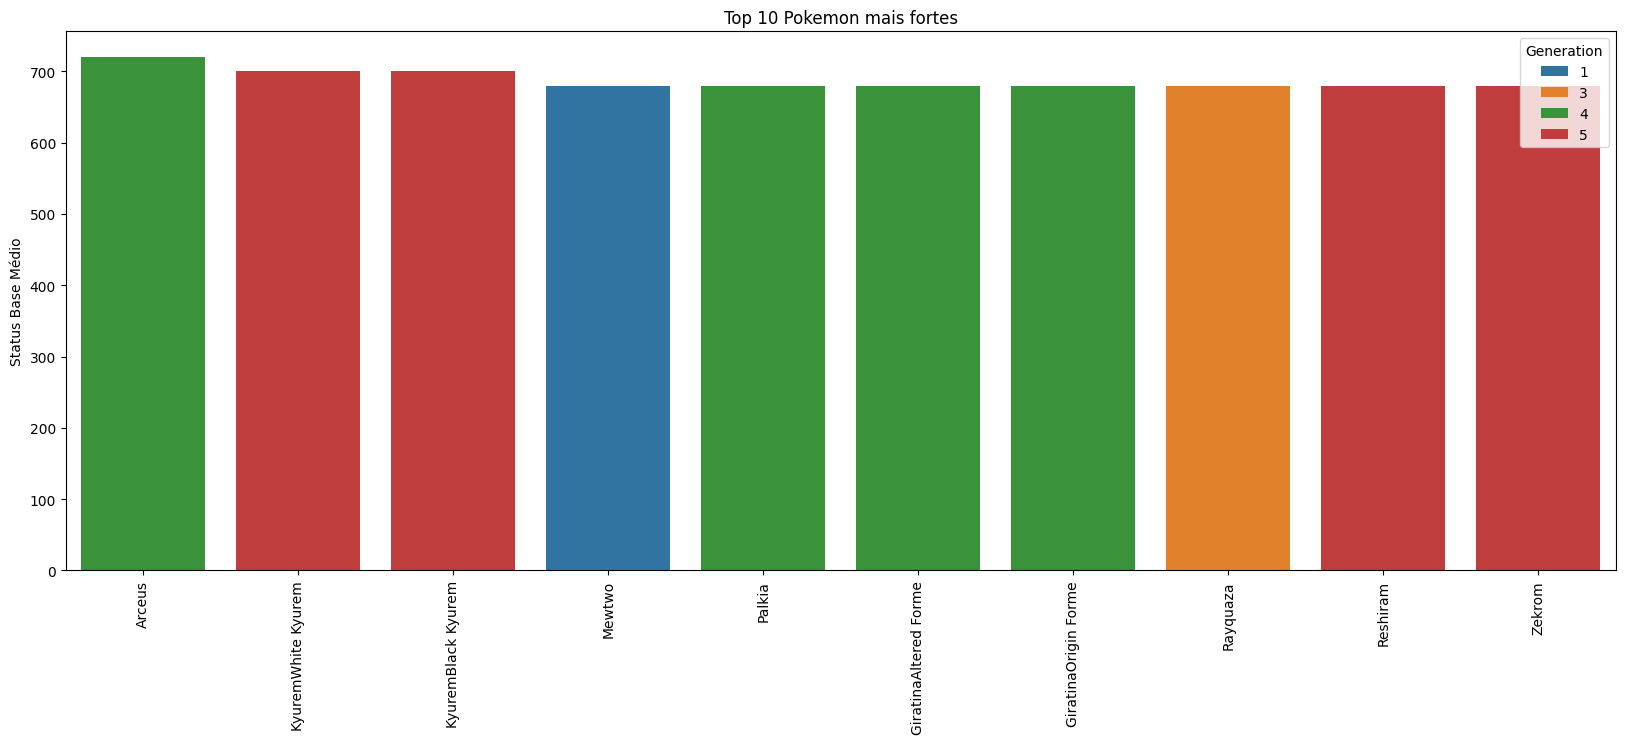

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(x = 'Name', y = 'Total Base Stats', data = top_10, hue = 'Generation',  palette = "tab10")
plt.xticks(rotation=90)
plt.title('Top 10 Pokemon mais fortes')
plt.ylabel('Status Base Médio')
plt.xlabel('')
plt.show()

In [ ]:
mascara3 = top['Legendary'] == False
top_SL = top.loc[mascara3]
top_10_SL = top_SL.head(10)

Sem os lendários, o novo top 10 é 90% de pokemon miticos e pseudos-lendários

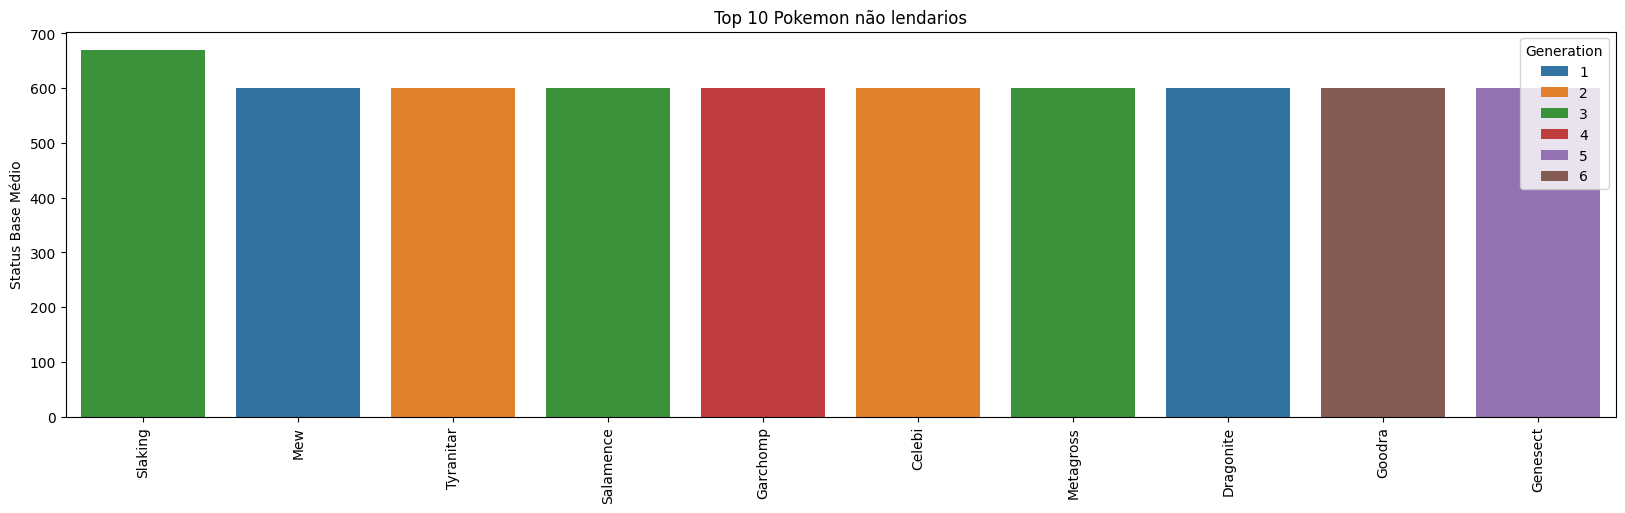

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x = 'Name', y = 'Total Base Stats', data = top_10_SL, hue = 'Generation',  palette = "tab10")
plt.xticks(rotation=90)
plt.title('Top 10 Pokemon não lendarios')
plt.ylabel('Status Base Médio')
plt.xlabel('')
plt.show()